# 知乎用户可视化

## 爬取了大概23w的知乎用户信息，哪有什么用呢，我们可以可视化一下知乎用户，分析一下

#### 首先读取知乎用户的信息,用户信息是存放在mongodb数据库中，于是使用pymongo来读取数据库中的信息

In [1]:
import pymongo
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib.font_manager import FontProperties
myfont = FontProperties(fname=r'C:\\Windows\\Fonts\\simhei.ttf',size=14)
%matplotlib inline
sns.set(font=myfont.get_name())

In [2]:
client = pymongo.MongoClient()
db = client['zhihu']
users = db['users']

In [3]:
users.find_one()

{'_id': ObjectId('59374278d8afc408b5a40944'),
 'avatar_url': 'https://pic1.zhimg.com/3a6c25ac3864540e80cdef9bc2a73900_xl.jpg',
 'business': '计算机软件',
 'company': 'Microsoft Office',
 'follower_count': 560201,
 'gender': 1,
 'headline': '专业造轮子，拉黑抢前排。gaclib.net',
 'job': 'Developer',
 'location': '西雅图（Seattle）',
 'name': 'vczh',
 'school': '华南理工大学（SCUT）',
 'url_token': 'excited-vczh',
 'voteup_count': 1258804}

In [4]:
cursor = users.find()
users = pd.DataFrame(list(cursor))
df_users = users[users.columns[1:]]

In [5]:
df_users.head()

,avatar_url,business,company,follower_count,gender,headline,job,location,name,school,url_token,voteup_count
0,https://pic1.zhimg.com/3a6c25ac3864540e80cdef9...,计算机软件,Microsoft Office,560201,1,专业造轮子，拉黑抢前排。gaclib.net,Developer,西雅图（Seattle）,vczh,华南理工大学（SCUT）,excited-vczh,1258804
1,https://pic1.zhimg.com/995927e05585fb227dc46f7...,基础教育,,3791,0,猫奴教师,,,悟空秋,山东大学,wu-kong-qiu,4128
2,https://pic3.zhimg.com/cc6f6e270567b799776037d...,人力资源,,1369,0,德国豆豆,,德国,夏天的绿豆豆,M.A,xia-tian-de-lu-dou-dou,2846
3,https://pic1.zhimg.com/v2-fc56a90ccec9f42d0b59...,,,382,0,魔兽世界永远的法师,,,BearMonica,,xiong-xiao-chai-jiao-zhu,1337
4,https://pic4.zhimg.com/v2-b55493bac1879d7dd971...,,,70,0,一不小心就玩脱的典型案例,,,Ruby,广西大学,nie-can-99,301


In [6]:
df_users.replace('',np.nan,inplace=True)
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232975 entries, 0 to 232974
Data columns (total 12 columns):
avatar_url        232975 non-null object
business          58372 non-null object
company           8962 non-null object
follower_count    232975 non-null int64
gender            232975 non-null int64
headline          150316 non-null object
job               8962 non-null object
location          47591 non-null object
name              232975 non-null object
school            28869 non-null object
url_token         232975 non-null object
voteup_count      232975 non-null int64
dtypes: int64(3), object(9)
memory usage: 21.3+ MB


C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [7]:
df_users.sample(100)

,avatar_url,business,company,follower_count,gender,headline,job,location,name,school,url_token,voteup_count
65758,https://pic3.zhimg.com/v2-e1ee29252b891738f5f0...,高等教育,NaN,2,1,"这些年没有走弯路, 但也没有走对路.......",NaN,NaN,Orchard,NaN,Marine-Lux-74-39,0
204860,https://pic3.zhimg.com/3b57d22db7b3b3b01de7b3e...,NaN,NaN,4,1,谨言慎行,NaN,NaN,汤姆煲老屎,NaN,tang-mu-bao-lao-shi,0
215419,https://pic4.zhimg.com/0e0d5c8c7_xl.jpg,NaN,NaN,2,0,毫无逻辑的纯粹文科生,NaN,南京,圈儿叔,NaN,er-diu-diu,10
231254,https://pic1.zhimg.com/da8e974dc_xl.jpg,NaN,NaN,5,1,NaN,NaN,NaN,南开来,杭州电子科技大学,nan-kai-lai,0
223648,https://pic1.zhimg.com/v2-bcf08a53c032561c083d...,互联网,NaN,25,0,自在随心。,NaN,NaN,所谓,NaN,suo-wei-93,228
205515,https://pic1.zhimg.com/v2-ce0621b7b636b6a74c05...,NaN,NaN,0,0,学生,NaN,NaN,罗如意,NaN,luo-ru-yi-61,0
17855,https://pic1.zhimg.com/a49678f68_xl.jpg,NaN,NaN,818,1,NaN,NaN,NaN,Chevovish,NaN,chevovish,1810
216261,https://pic1.zhimg.com/da8e974dc_xl.jpg,NaN,NaN,0,-1,ICU医生,NaN,NaN,徐sir,NaN,xu-sir-84-35,0
15240,https://pic1.zhimg.com/da8e974dc_xl.jpg,NaN,NaN,0,-1,NaN,NaN,NaN,余生,NaN,only_yusheng,0
215806,https://pic2.zhimg.com/v2-66a93608bd784754d6de...,NaN,NaN,13,0,NaN,NaN,NaN,刘饿,NaN,liu-e-85-71,151


In [8]:
total_count = sum(df_users['voteup_count'].values)

In [9]:
total_count

244802823

## 先对点赞数进行排序

In [10]:
top20_votup_count = df_users.sort(columns=['voteup_count'],ascending=False)[:20]

C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


In [11]:
top20_votup_count.name

17748                张佳玮
455                  马前卒
18819                肥肥猫
62079                 唐缺
0                   vczh
18276                 朱炫
61795        Seasee Youl
9625                  豆子
61823                鬼木知
3511                 寺主人
61448    Hannibal Lecter
61801                曾少贤
3299             yolfilm
60274             大盗贼霍老爷
3593                 孟德尔
1863                  菠菜
144                  陈兰香
1364               恶膜的奶爸
9713                  曾加
4002                 王瑞恩
Name: name, dtype: object

In [12]:
top20_votup_count['voteup_count'].values

array([3501468, 1395080, 1313498, 1294824, 1258804, 1212099, 1114280,
       1089576, 1056289, 1026602, 1003980,  947658,  937026,  833971,
        789427,  773172,  689782,  664096,  657901,  618180], dtype=int64)

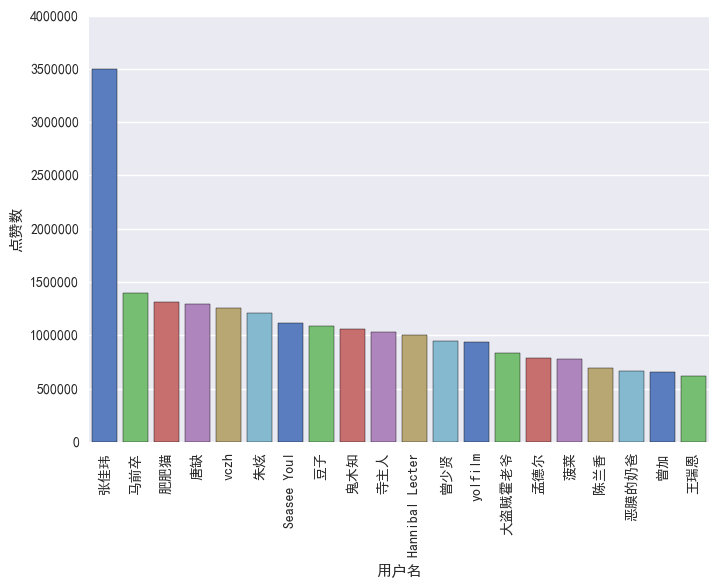

In [13]:
sns.barplot(x=top20_votup_count['name'],y=top20_votup_count['voteup_count'],palette="muted",order=top20_votup_count.name.tolist())
plt.xticks(rotation=90)
plt.ylabel('点赞数')
plt.xlabel('用户名')
plt.xticks()
plt.show()

## 可以看见大v 张佳伟点赞数远超第二马前卒

## 查看知乎用户的地区分布

In [14]:
top20_city = df_users.location.value_counts()[:20]

In [15]:
top20_city

北京     7863
上海     4978
杭州     1907
成都     1360
深圳市    1311
南京     1204
武汉     1180
广州     1116
深圳     1113
广州市    1069
西安      858
重庆      662
天津      577
长沙      462
苏州      447
青岛      441
厦门      429
郑州      373
美国      342
香港      337
Name: location, dtype: int64

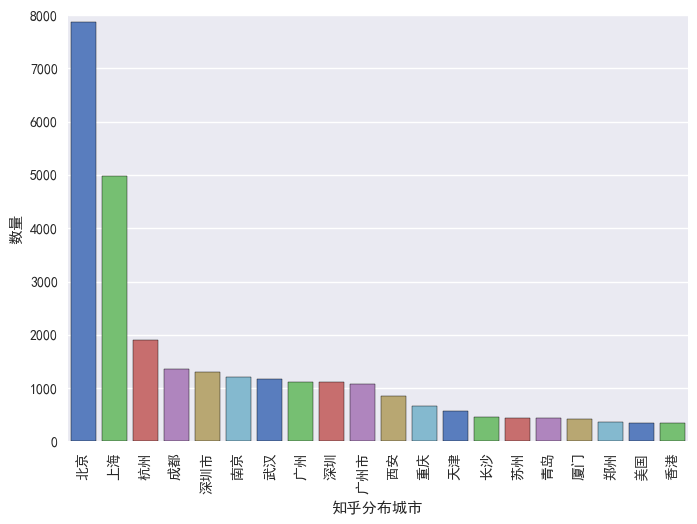

In [16]:
sns.barplot(x=top20_city.index,y=top20_city.values,palette="muted",order=top20_city.index.tolist())
plt.xticks(rotation=90)
plt.xlabel('知乎分布城市')
plt.ylabel('数量')
plt.show()

## 可以看见知乎的分布城市大部分是北京 上海 杭州 成都

## 看看知乎用户性别的分布

In [44]:
gender = df_users.gender.value_counts()

In [46]:
type(gender)

pandas.core.series.Series

In [64]:
gender

-1    92141
 1    74441
 0    66393
Name: gender, dtype: int64

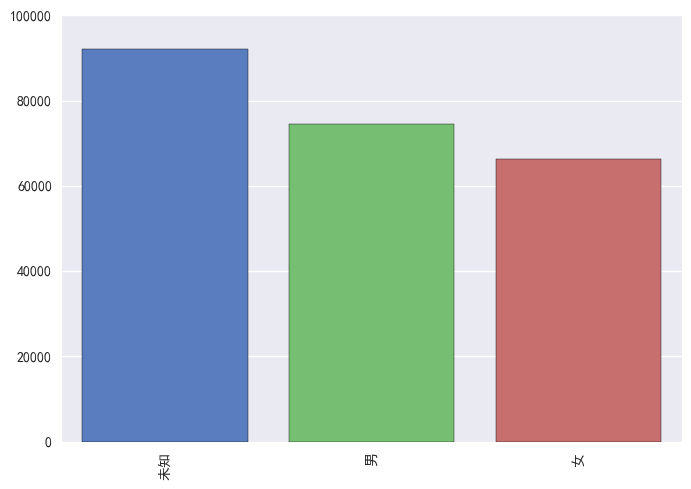

In [71]:
gender.index = gender.index.map(lambda x:'男' if x==1 else '女' if x==0 else '未知')
sns.barplot(x=gender.index,y=gender.values,palette='muted',order=gender.index.tolist())
plt.xticks(rotation=90)
plt.show()

## 可以看出来 很多用户对自己的隐私保护的很好 哈哈

In [72]:
top_school = df_users.school.value_counts()[:20]

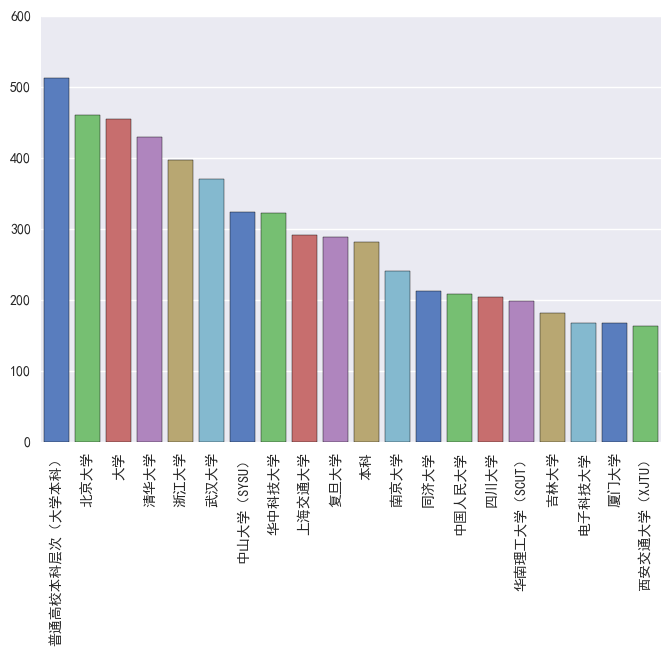

In [74]:
sns.barplot(x=top_school.index,y=top_school.values,palette='muted',order=top_school.index.tolist())
plt.xticks(rotation=90)
plt.show()

## 看看用户从事的职业

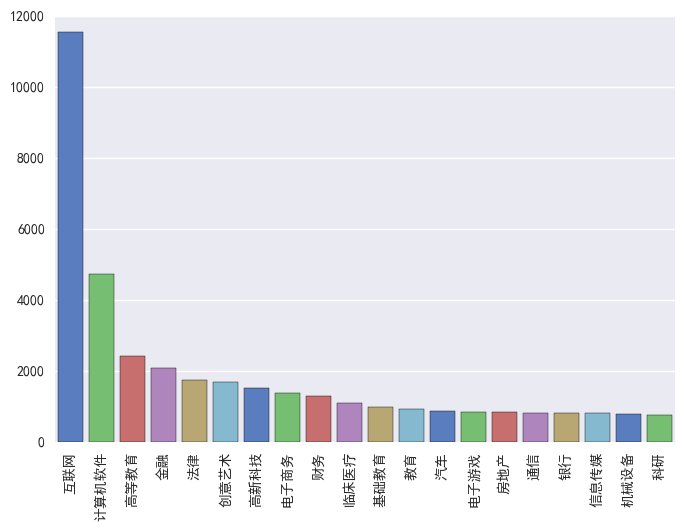

In [76]:
top50_job = df_users.business.value_counts()[:20]
sns.barplot(x=top50_job.index,y=top50_job.values,palette='muted',order=top50_job.index.tolist())
plt.xticks(rotation=90)
plt.show()

### 互联网啊 最多啊